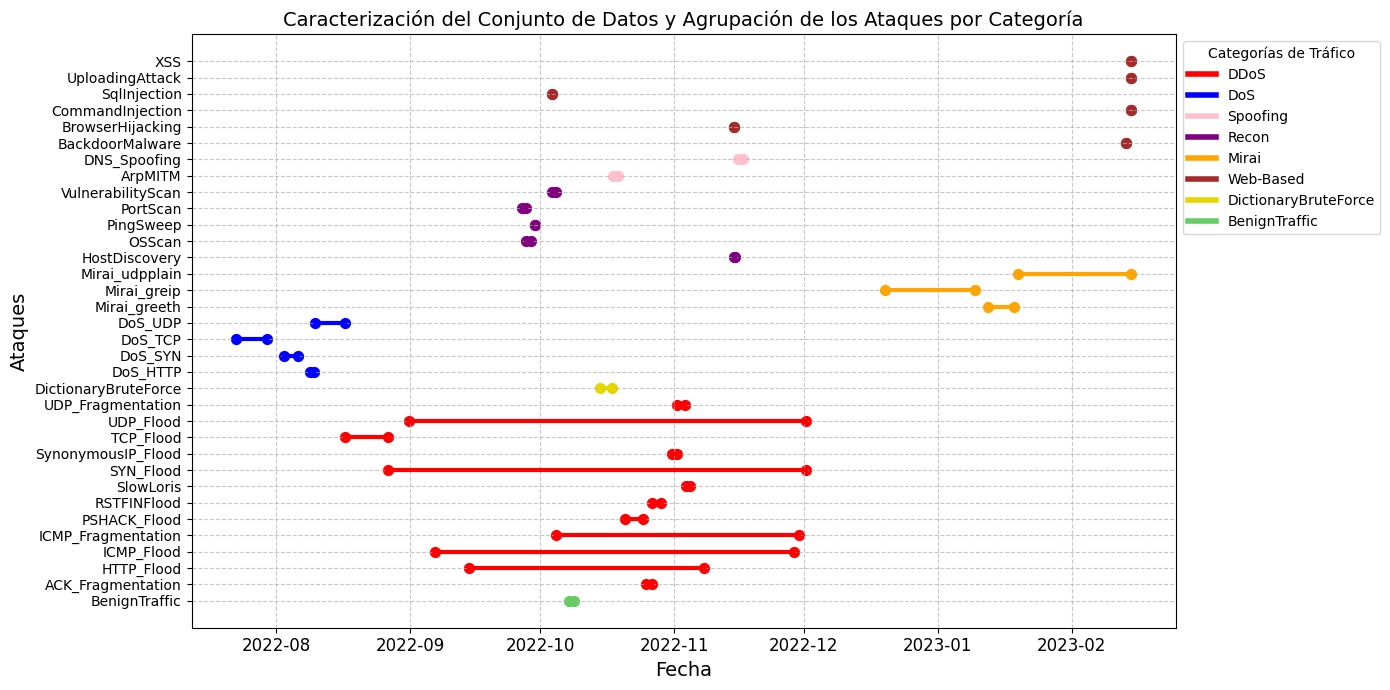

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
import random

# Definir los datos de ataques y tráfico benigno
data = [
    # BENIGN TRAFFIC (Agrupado)
    ("BenignTraffic", "2022-10-07 19:15:00", "2022-10-08 23:15:00"),

    # DDOS
    ("ACK_Fragmentation", "2022-10-25 14:26:00", "2022-10-26 22:21:00"),
    ("HTTP_Flood", "2022-09-14 15:47:00", "2022-11-07 20:46:00"),
    ("ICMP_Flood", "2022-09-06 17:57:00", "2022-11-28 21:01:59"),
    ("ICMP_Fragmentation", "2022-10-04 18:55:00", "2022-11-29 21:40:59"),
    ("PSHACK_Flood", "2022-10-20 15:55:00", "2022-10-24 22:28:00"),
    ("RSTFINFlood", "2022-10-26 22:43:00", "2022-10-28 22:14:00"),
    ("SlowLoris", "2022-11-03 19:18:00", "2022-11-04 14:23:59"),
    ("SYN_Flood", "2022-08-26 20:18:00", "2022-12-01 15:43:00"),
    ("SynonymousIP_Flood", "2022-10-31 13:49:00", "2022-11-01 15:41:59"),
    ("TCP_Flood", "2022-08-16 18:33:00", "2022-08-26 18:16:00"),
    ("UDP_Flood", "2022-08-31 15:19:00", "2022-12-01 15:23:58"),
    ("UDP_Fragmentation", "2022-11-01 18:44:00", "2022-11-03 14:52:00"),

    # DICTIONARYBRUTEFORCE
    ("DictionaryBruteForce", "2022-10-14 18:18:00", "2022-10-17 17:02:00"),

    # DOS
    ("DoS_HTTP", "2022-08-08 18:25:00", "2022-08-09 18:22:00"),
    ("DoS_SYN", "2022-08-02 15:42:00", "2022-08-05 21:07:00"),
    ("DoS_TCP", "2022-07-22 16:41:31", "2022-07-29 22:07:00"),
    ("DoS_UDP", "2022-08-09 20:37:00", "2022-08-16 18:05:00"),

    # MIRAI
    ("Mirai_greeth", "2023-01-12 16:19:00", "2023-01-18 16:52:01"),
    ("Mirai_greip", "2022-12-19 17:23:00", "2023-01-09 16:26:00"),
    ("Mirai_udpplain", "2023-01-19 16:51:00", "2023-02-14 18:37:57"),

    # RECON
    ("HostDiscovery", "2022-11-14 23:38:00", "2022-11-15 05:16:16"),
    ("OSScan", "2022-09-27 20:07:00", "2022-09-28 21:38:00"),
    ("PingSweep", "2022-09-29 18:58:00", "2022-09-29 21:29:00"),
    ("PortScan", "2022-09-26 18:31:00", "2022-09-27 19:16:00"),

    # VULNERABILITYSCAN
    ("VulnerabilityScan", "2022-10-03 16:02:00", "2022-10-04 14:31:03"),

    # SPOOFING
    ("ArpMITM", "2022-10-17 22:20:00", "2022-10-18 22:56:00"),
    ("DNS_Spoofing", "2022-11-15 17:16:00", "2022-11-16 21:25:00"),

    # WEB ATTACKS
    ("BackdoorMalware", "2023-02-13 14:58:00", "2023-02-13 15:32:00"),
    ("BrowserHijacking", "2022-11-14 21:23:00", "2022-11-14 21:48:59"),
    ("CommandInjection", "2023-02-14 15:53:00", "2023-02-14 16:32:00"),
    ("SqlInjection", "2022-10-03 19:17:00", "2022-10-03 20:09:00"),
    ("UploadingAttack", "2023-02-14 17:52:00", "2023-02-14 18:05:00"),
    ("XSS", "2023-02-14 16:46:00", "2023-02-14 17:25:59"),
]

# Convertir los datos a un DataFrame
df = pd.DataFrame(data, columns=["Tipo de Ataque", "Inicio", "Fin"])
df["Inicio"] = pd.to_datetime(df["Inicio"])
df["Fin"] = pd.to_datetime(df["Fin"])

# Definir las categorías de ataques
category_colors = {
    "DDoS": "red",
    "DoS": "blue",
    "Spoofing": "pink",
    "Recon": "purple",
    "Mirai": "orange",
    "Web-Based": "brown",
    "DictionaryBruteForce": "yellow",
    "BenignTraffic": "green"
}

# Mapeo de cada ataque a su categoría
attack_categories = {
    "ACK_Fragmentation": "DDoS",
    "HTTP_Flood": "DDoS",
    "ICMP_Flood": "DDoS",
    "ICMP_Fragmentation": "DDoS",
    "PSHACK_Flood": "DDoS",
    "RSTFINFlood": "DDoS",
    "SlowLoris": "DDoS",
    "SYN_Flood": "DDoS",
    "SynonymousIP_Flood": "DDoS",
    "TCP_Flood": "DDoS",
    "UDP_Flood": "DDoS",
    "UDP_Fragmentation": "DDoS",

    "DoS_HTTP": "DoS",
    "DoS_SYN": "DoS",
    "DoS_TCP": "DoS",
    "DoS_UDP": "DoS",

    "ArpMITM": "Spoofing",
    "DNS_Spoofing": "Spoofing",

    "HostDiscovery": "Recon",
    "OSScan": "Recon",
    "PingSweep": "Recon",
    "PortScan": "Recon",
    "VulnerabilityScan": "Recon",

    "Mirai_greeth": "Mirai",
    "Mirai_greip": "Mirai",
    "Mirai_udpplain": "Mirai",

    "SqlInjection": "Web-Based",
    "CommandInjection": "Web-Based",
    "BackdoorMalware": "Web-Based",
    "UploadingAttack": "Web-Based",
    "XSS": "Web-Based",
    "BrowserHijacking": "Web-Based",

    "DictionaryBruteForce": "DictionaryBruteForce",

    "BenignTraffic": "BenignTraffic"
}

# Asignar la categoría a cada ataque en el DataFrame
df["Categoría"] = df["Tipo de Ataque"].map(attack_categories)

# Ajustar colores para mejor visualización
category_colors["BenignTraffic"] = "#66cc66"
category_colors["DictionaryBruteForce"] = "#e6d600"

# Configurar la figura
fig, ax = plt.subplots(figsize=(14, 7))

# Graficar cada ataque con su color de categoría y agregar círculos en los extremos sin borde
for i, row in df.iterrows():
    color = category_colors.get(row["Categoría"], "black")
    ax.plot([row["Inicio"], row["Fin"]], [i, i], color=color, linewidth=3)
    ax.scatter([row["Inicio"], row["Fin"]], [i, i], color=color, s=50, marker="o")


# Mejorar la presentación
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df["Tipo de Ataque"])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(rotation=0, fontsize=12)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Ataques", fontsize=14)
plt.title("Caracterización del Conjunto de Datos y Agrupación de los Ataques por Categoría", fontsize = 14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Crear la leyenda
legend_patches = [plt.Line2D([0], [0], color=color, lw=4, label=category) for category, color in category_colors.items()]
plt.legend(handles=legend_patches, title="Categorías de Tráfico", loc="upper left", bbox_to_anchor=(1, 1))

# Ajustar diseño y guardar el gráfico
plt.tight_layout()
plt.savefig("/home/miguel/Escritorio/Matrices/Prueba 1/caracterizacion_dataset.pdf", format='pdf')
plt.show()